In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
from os.path import join as path_join
import seaborn as sns
%matplotlib inline

IMAGES_DIR = 'Images'

In [ ]:
df = pd.read_csv('GWAS_clinical.csv')

In [ ]:
df.head()

In [ ]:
df['age'].hist()

In [ ]:
df.corr()

In [ ]:
# Age-dependant triglycerides level with sex distinction
df.groupby(['age', 'sex'])['tg'].mean().unstack().plot(marker='o', linestyle='none')
plt.xlabel('Age')
plt.ylabel('Triglycerides level')
plt.title('Age - Triglycerides')
plt.savefig(path_join(IMAGES_DIR, 'age-tg-sex.png'))

In [ ]:
# Age-dependant HDL level with sex distinction
df.groupby(['age', 'sex'])['hdl'].mean().unstack().plot(marker='o', linestyle='none')
plt.xlabel('Age')
plt.ylabel('HDL')
plt.title('Age - HDL')
plt.savefig(path_join(IMAGES_DIR, 'age-hdl-sex.png'))

In [ ]:
# Age-dependant LDL level with sex distinction
df.groupby(['age', 'sex'])['ldl'].mean().unstack().plot(marker='o', linestyle='none')
plt.xlabel('Age')
plt.ylabel('LDL')
plt.title('Age - LDL')
plt.savefig(path_join(IMAGES_DIR, 'age-ldl-sex.png'))

In [ ]:
# Age-dependant CAD normalized value with sex distinction
df.groupby(['age', 'sex'])['CAD'].mean().unstack().plot(marker='o', linestyle='none')
plt.xlabel('Age')
plt.ylabel('CAD')
plt.title('Age - CAD')
plt.savefig(path_join(IMAGES_DIR, 'age-cad-sex.png'))

In [ ]:
# Age-dependant triglycerides level with CAD distinction
df.groupby(['age', 'CAD'])['tg'].mean().unstack().plot()
plt.xlabel('Age')
plt.ylabel('Triglycerides level')
plt.title('Age - HDL (CAD)')
plt.savefig(path_join(IMAGES_DIR, 'age-hdl-cad.png'))

In [ ]:
# Age-dependant LDL level with CAD distinction
df.groupby(['age', 'CAD'])['ldl'].mean().unstack().plot()
plt.xlabel('Age')
plt.ylabel('LDL')
plt.title('Age - LDL (CAD)')
plt.savefig(path_join(IMAGES_DIR, 'age-ldl-cad.png'))

In [ ]:
# Age-dependant HDL level with CAD distinction
df.groupby(['age', 'CAD'])['hdl'].mean().unstack().plot()
plt.xlabel('Age')
plt.ylabel('HDL')
plt.title('Age - HDL (CAD)')
plt.savefig(path_join(IMAGES_DIR, 'age-hdl-cad.png'))

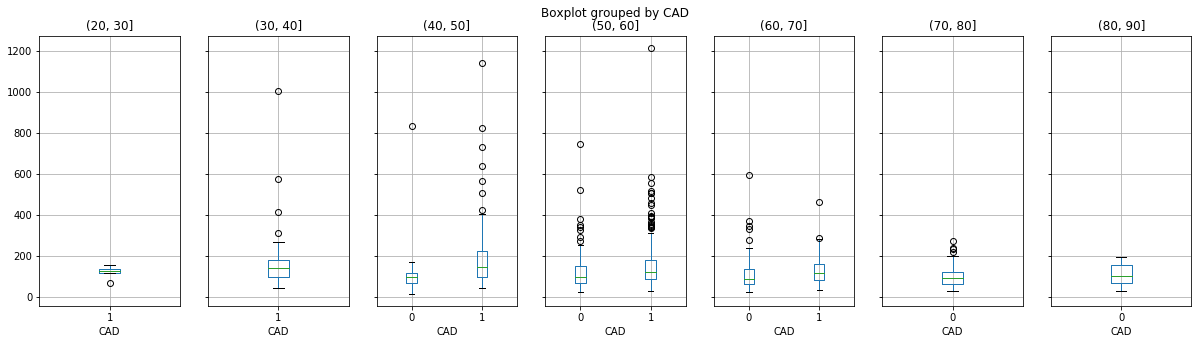

In [198]:
ir = pd.interval_range(start=20, end=90, periods=7)
df.groupby(pd.cut(df['age'], ir)).boxplot(column='tg', by='CAD', figsize=(20, 5), layout=(1, 7))
plt.savefig(path_join(IMAGES_DIR, 'boxplot-age-groups-cad-tg.png'))

In [199]:
# TG
ir = pd.interval_range(start=20, end=90, periods=7)
df.groupby([pd.cut(df['age'], ir), 'CAD'])['tg'].agg(len).unstack() 
# Showing lengths of data lists
# When 0 and 1 exist, len of lists > 30

CAD,0,1
age,,
"(20, 30]",NaN,8.0
"(30, 40]",NaN,69.0
"(40, 50]",57.0,224.0
"(50, 60]",181.0,519.0
"(60, 70]",132.0,113.0
"(70, 80]",79.0,NaN
"(80, 90]",19.0,NaN


/home/alexey/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alexey/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


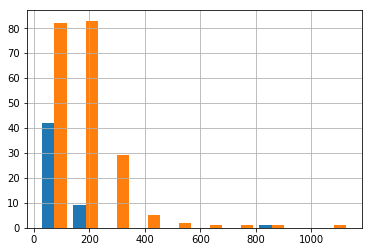

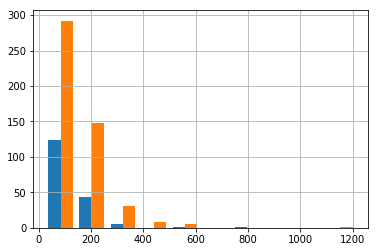

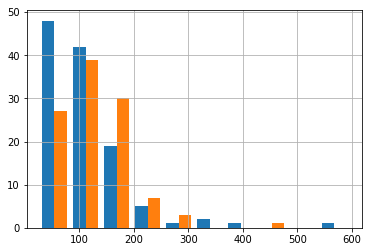

In [197]:
tg_age_cad = df.groupby([pd.cut(df['age'], ir), 'CAD'])['tg'].agg(list).unstack().iloc[2:5]
for c, row in tg_age_cad.iterrows():
    row.hist()
    plt.show()
# Distribution is not normal

In [ ]:
ir = pd.interval_range(start=20, end=90, periods=7)
df.groupby([pd.cut(df['age'], ir), 'CAD'])['tg'].agg(len).unstack() # When 0 and 1 exist, len of lists > 30
tg_age_cad = df.groupby([pd.cut(df['age'], ir), 'CAD'])['tg'].agg(list).unstack().iloc[2:5]
for c, row in tg_age_cad.iterrows():
    s, p = stat.mannwhitneyu(row[0], row[1])
    print(p)

In [ ]:
# HDL
ir = pd.interval_range(start=20, end=90, periods=7)
df.groupby([pd.cut(df['age'], ir), 'CAD'])['hdl'].agg(len).unstack() # When 0 and 1 exist, len of lists > 30

In [ ]:
hdl_age_cad = df.groupby([pd.cut(df['age'], ir), 'CAD'])['hdl'].agg(list).unstack().iloc[2:5]
for c, row in tg_age_cad.iterrows():
    row.hist()
    plt.show()
# Distribution is normal

In [196]:
ir = pd.interval_range(start=20, end=90, periods=7)
hdl_age_cad = df.groupby([pd.cut(df['age'], ir), 'CAD'])['hdl'].agg(list).unstack().iloc[2:5]
for c, row in hdl_age_cad.iterrows():
    r1 = np.array(row[0])
    r1 = r1[np.logical_not(np.isnan(r1))]
    r2 = np.array(row[1])
    r2 = r2[np.logical_not(np.isnan(r2))]
    s, p = stat.ttest_ind(r1, r2)
    print(p)

0.0038925301511416014
4.999057734901896e-11
0.1453443557167187


In [ ]:
# LDL
ir = pd.interval_range(start=20, end=90, periods=7)
df.groupby([pd.cut(df['age'], ir), 'CAD'])['ldl'].agg(len).unstack() # When 0 and 1 exist, len of lists > 30

In [ ]:
ldl_age_cad = df.groupby([pd.cut(df['age'], ir), 'CAD'])['ldl'].agg(list).unstack().iloc[2:5]
for c, row in ldl_age_cad.iterrows():
    row.hist()
    plt.show()
# Distribution is normal

In [ ]:
ir = pd.interval_range(start=20, end=90, periods=7)
ldl_age_cad = df.groupby([pd.cut(df['age'], ir), 'CAD'])['ldl'].agg(list).unstack().iloc[2:5]
for c, row in ldl_age_cad.iterrows():
    r1 = np.array(row[0])
    r1 = r1[np.logical_not(np.isnan(r1))]
    r2 = np.array(row[1])
    r2 = r2[np.logical_not(np.isnan(r2))]
    s, p = stat.ttest_ind(r1, r2)
    print(p)

In [219]:
# HDL grouped by CAD difference checking with t test and wmw test
hdl_cad = df.groupby(['CAD'])['hdl'].agg(list)

r1 = np.array(hdl_cad[0])
r1 = r1[np.logical_not(np.isnan(r1))]
r2 = np.array(hdl_cad[1])
r2 = r2[np.logical_not(np.isnan(r2))]
s, p = stat.ttest_ind(r1, r2)
print("HDL T-test:", p)
s, p = stat.mannwhitneyu(r1, r2)
print("HDL WMW-test:", p)
hdl_p = p

# LDL grouped by CAD difference checking with t test
hdl_cad = df.groupby(['CAD'])['ldl'].agg(list)

r1 = np.array(hdl_cad[0])
r1 = r1[np.logical_not(np.isnan(r1))]
r2 = np.array(hdl_cad[1])
r2 = r2[np.logical_not(np.isnan(r2))]
s, p = stat.ttest_ind(r1, r2)
print("LDL T-test:", p)
s, p = stat.mannwhitneyu(r1, r2)
print("HDL WMW-test:", p)
ldl_p = p


# TG grouped by CAD difference checking with t test
hdl_cad = df.groupby(['CAD'])['tg'].agg(list)

r1 = np.array(hdl_cad[0])
r1 = r1[np.logical_not(np.isnan(r1))]
r2 = np.array(hdl_cad[1])
r2 = r2[np.logical_not(np.isnan(r2))]
s, p = stat.ttest_ind(r1, r2)
print("TG T-test:", p)
s, p = stat.mannwhitneyu(r1, r2)
print("HDL WMW-test:", p)
tg_p = p

HDL T-test: 3.179167258382557e-20
HDL WMW-test: 8.609335702177499e-19
LDL T-test: 0.5533302168802736
HDL WMW-test: 0.05096286132930089
TG T-test: 6.254538177553909e-12
HDL WMW-test: 1.9717600203129928e-20


/home/alexey/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:204: UserWarning: When passing multiple axes, layout keyword is ignored
  "ignored", UserWarning)
/home/alexey/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:2257: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


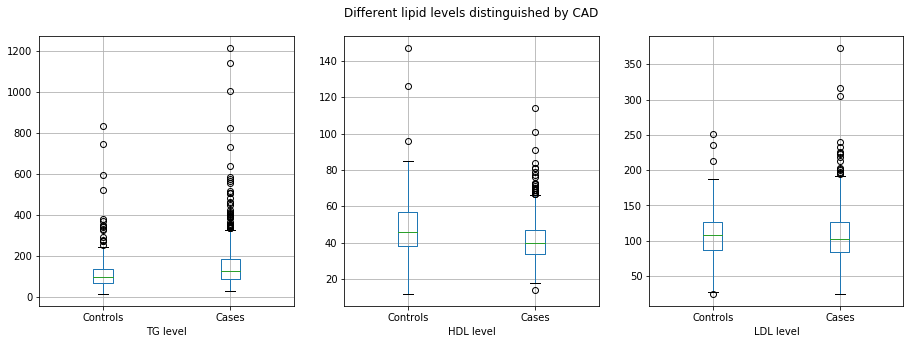

In [195]:
# Boxplot with different lipid levels distinguished by CAD
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
df.boxplot(column=['tg', 'hdl', 'ldl'], by='CAD', figsize=(15, 5), layout=(1, 3), ax=axs)

axs[0].set_title("")
axs[0].set_xlabel("TG level")

axs[1].set_title("")
axs[1].set_xlabel("HDL level")

axs[2].set_title("")
axs[2].set_xlabel("LDL level")

# Changing 0 and 1 to controls and cases
for ax in axs:
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = "Controls"
    labels[1] = "Cases"
    ax.set_xticklabels(labels)

plt.suptitle("Metabolite levels in CAD groups")
plt.savefig(path_join(IMAGES_DIR, 'boxplot-lipid_type-cad-level.png'))

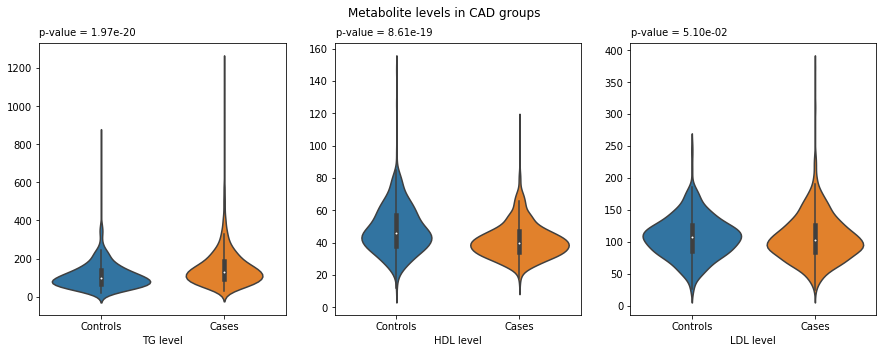

In [235]:
# Violinplot with different lipid levels distinguished by CAD
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.violinplot('CAD', 'tg',  data=df, ax=axs[0])
fig.canvas.draw()

axs[0].set_xlabel("TG level")
axs[0].set_ylabel("")

sns.violinplot('CAD', 'hdl',  data=df, ax=axs[1])
axs[1].set_xlabel("HDL level")
axs[1].set_ylabel("")

sns.violinplot('CAD', 'ldl',  data=df, ax=axs[2])
axs[2].set_xlabel("LDL level")
axs[2].set_ylabel("")

plt.suptitle("Metabolite levels in CAD groups")

# Changing 0 and 1 to controls and cases
for ax in axs:
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = "Controls"
    labels[1] = "Cases"
    ax.set_xticklabels(labels)
    
plt.figtext(0.125, 0.9, "p-value = {:0.2e}".format(tg_p))
plt.figtext(0.4, 0.9, "p-value = {:0.2e}".format(hdl_p))
plt.figtext(0.6725, 0.9, "p-value = {:0.2e}".format(ldl_p))

plt.savefig(path_join(IMAGES_DIR, 'violinplot-lipid_type-cad-level.png'))

HDL T-test: 3.179167258382557e-20
HDL WMW-test: 8.609335702177499e-19
LDL T-test: 0.5533302168802736
HDL WMW-test: 0.05096286132930089
TG T-test: 6.254538177553909e-12
HDL WMW-test: 1.9717600203129928e-20
